Big Data for Marketing project :
Clément FAUCOMPRE / Bora NUMANI / Jean-Eudes AYILO / Aurélien DEVILLARD

# Introduction

##### Topic Introduction



Sentiment Analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to automatically identify, extract, quantify, and study affective states and subjective information in text. 

The process involves taking a piece of text, whether a phrase or a full article and analyzing the emotion the author is expressing. Our focus is on analysing customer reviews and predicting the level of contetment the customer has had on the product or service offered.

For this project, we have extracted Amazon reviews to train our models and Datafiniti Hotel Reviews to test them.


The approaches we have followed are: 

Rule-based approaches, which rely on manually defined rules in a scripted language that incorporate NLP techniques, like stemming and  tokenization.
Automatic approaches, which build upon machine-learning techniques and frame the task as a classification problem to be solved by neural networks and other statistical models.

Hybrid systems, which combine elements of both approaches.




To ease the running of the code seperately in each section, we have saved the importation of the datasets and the needed packages at the beginning of each section. Therefore, we do have some repetitive lines of code.

As shown in the Table of Contents:

In Section 1. We have Visualized the data using WordClouds

In Section 2. We have applied ML models for sentiment classification: 

          1. Random Forest
          2. SVM
          3. Naive Bayes Classifier
          4. LSTM
          5. BERT

In Section 3. We have done LDA topic Modelling in the Datafiniti Hotel Reviews Dataset.

In Section 4. We have Clustered the Hotel Reviews Dataset; 

In Section 5. We have unveilled the economic interest of such analysis and the interpretations with a Marketing Approach and concluded on the results we obtained.  



#### Importation of needed librairies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
#nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter
import re

import sklearn
from wordcloud import WordCloud

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SimpleRNN, SpatialDropout1D, Bidirectional

In [ ]:
## Pour colab
from google.colab import files
uploaded = files.upload()


Saving training_dataframe_light.csv to training_dataframe_light.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['training_dataframe_light.csv']))
df

,overall,label,reviewText,summary,review,tokenized,clean_review,tokens_count
0,negative,2,Although users are quite happy with the printe...,Single Cartridge for colors?,Single Cartridge for colors? Although users ar...,"['single', 'cartridge', 'color', 'although', '...",single cartridge color although user quite hap...,20
1,positive,0,I like the way this holds my Kindle and keeps ...,Perfect way to protect my Kindle.,Perfect way to protect my Kindle. I like the w...,"['perfect', 'way', 'protect', 'kindle', 'like'...",perfect way protect kindle like way hold kindl...,46
2,positive,0,This Shany eyeshadow kit is a good buy for eve...,Good Buy,Good Buy This Shany eyeshadow kit is a good bu...,"['good', 'buy', 'shany', 'eyeshadow', 'kit', '...",good buy shany eyeshadow kit good buy everyone...,17
3,positive,0,These are solid new balance shoes that look gr...,"Great shoes, Great Price","Great shoes, Great Price These are solid new b...","['great', 'shoe', 'great', 'price', 'solid', '...",great shoe great price solid new balance shoe ...,35
4,negative,2,"EDIT: This mop quit ""steaming"" today. 06/24/20...",My first steam mop,"My first steam mop EDIT: This mop quit ""steami...","['first', 'steam', 'mop', 'edit', 'mop', 'quit...",first steam mop edit mop quit steaming today t...,238
...,...,...,...,...,...,...,...,...
14988,neutral,1,I was disappointed in the SuperTab feature bec...,Misleading Information,Misleading Information I was disappointed in t...,"['misleading', 'information', 'disappointed', ...",misleading information disappointed supertab f...,38
14989,neutral,1,I am about a 32 DD and finding nursing bras in...,"Comfy, looks good on, but not under things","Comfy, looks good on, but not under things I a...","['comfy', 'look', 'good', 'thing', 'dd', 'find...",comfy look good thing dd finding nursing bra r...,67
14990,positive,0,These pre-stretched canvases are very well mad...,Quality,Quality These pre-stretched canvases are very ...,"['quality', 'canvas', 'well', 'made', 'sturdy'...",quality canvas well made sturdy especially pri...,19
14991,positive,0,My favorite hair oil it makes your hair shiny ...,Great Oil,Great Oil My favorite hair oil it makes your h...,"['great', 'oil', 'favorite', 'hair', 'oil', 'm...",great oil favorite hair oil make hair shiny so...,32


# I] Visualisation (Clément and Aurélien)

We have a done a bit of exploraratory data analysis to see how the data behaves. We chose to keep reviews made of less than 300 tokens, to reduce the computations needed for the models we are using.

## Graphs to show the sentiments distribution
As we have selected reviews that contained only less than 300 tokens, the size of the reviews for each type of review is quite similar.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

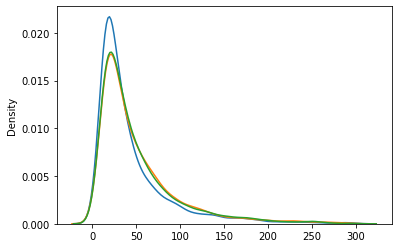

In [ ]:
# Checking number of tokens in review depending on sentiment

df_pos = df[df['overall']=='positive']
df_neu = df[df['overall']=='neutral']
df_neg = df[df['overall']=='negative']

sns.distplot(df_pos[['tokens_count']], hist=False)
sns.distplot(df_neu[['tokens_count']], hist=False)
sns.distplot(df_neg[['tokens_count']], hist=False)

## Wordcloud
There we have realised a wordcloud printing the most frequent words (after cleaning and removing stopwords) in our total dataset

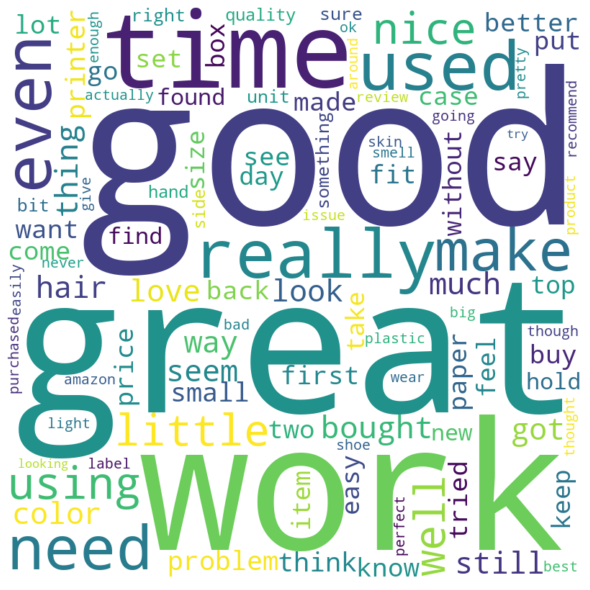

In [ ]:
# Global wordcloud

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white',
            max_words=100,
            #stopwords = mystopwords2, 
            min_font_size = 10).generate(' '.join(df['clean_review']))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

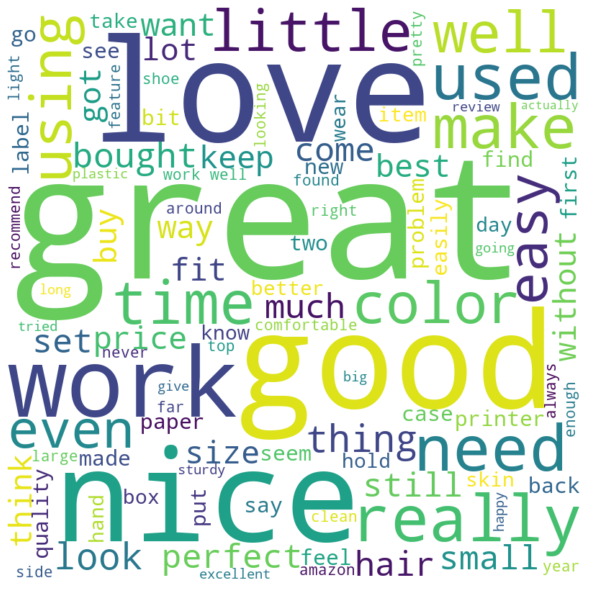

In [ ]:
# Positive review wordcloud

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white',
            max_words=100,
            #stopwords = mystopwords2, 
            min_font_size = 10).generate(' '.join(df_pos['clean_review']))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

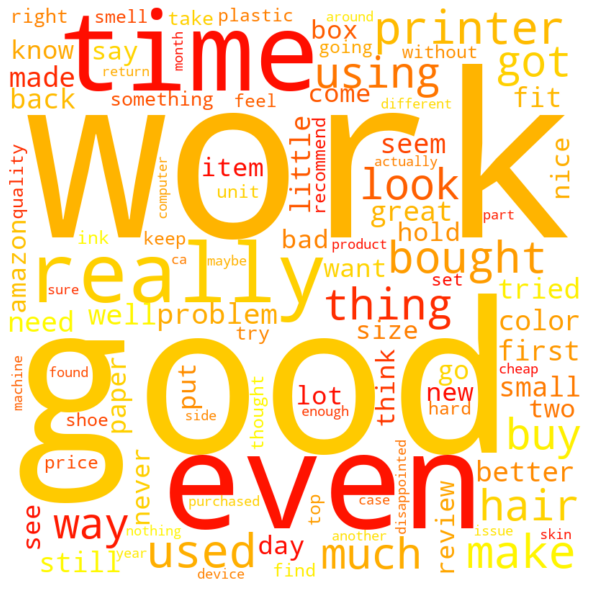

In [ ]:
# Negative review wordcloud

wordcloud_neg = WordCloud(width = 800, height = 800, 
            background_color ='white',
            colormap='autumn',
            max_words=100,
            #stopwords = mystopwords2, 
            min_font_size = 10).generate(' '.join(df_neg['clean_review']))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_neg,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

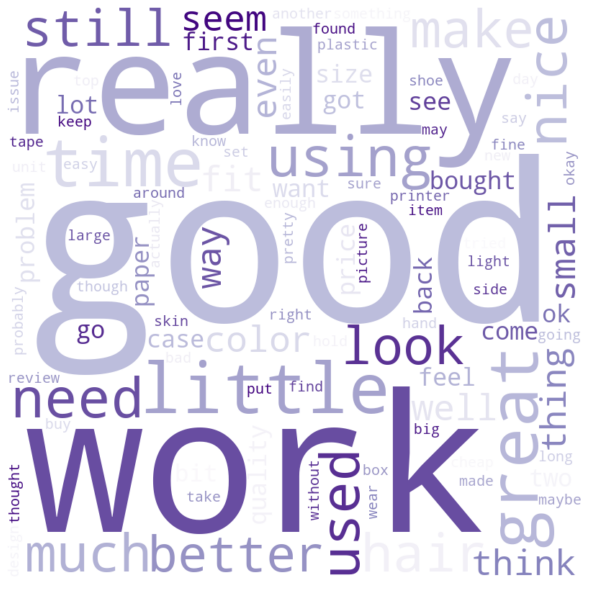

In [ ]:
# Neutral review wordcloud

wordcloud_neu = WordCloud(width = 800, height = 800, 
            background_color ='white',
            colormap='Purples',
            max_words=100,
            #stopwords = mystopwords2, 
            min_font_size = 10).generate(' '.join(df_neu['clean_review']))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_neu,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

**Insights from the worcloud specific to each label** <br>
We can see that the words "good, great, love" are the often present for the positive reviews, which makes sense. About the negative reviews, we find the word "good", which is surprising and again in the most frequents ones we also have "time, really, even". <br>
Finally, in the group of neutral reviews, the most frequent words are "work, really, little, good". <br>
What is noticeable is that some words are present in all type of reviews (such as good) but some other are exclusive to a type of review, such as "love, great, nice" that are only in the positive reviews. From this, we could expect an easier classification for the positive reviews than for other, are they seem to be me identifiable. <br>
Finally, there are some words appearing in each type of review that are specific to our dataset : "hair", or even "paper" are not specifically indicating the happiness of the customer.

# II]  Machine Learning models for sentiment classification (Clément and Aurélien)

We start by storing the reviews and the labels into arrays to be able to use them with our models.

In [ ]:
features = df['tokenized'].values
features

array(["['go', 'empty', 'pretty', 'quick', 'maybe', 'used', 'work', 'well', 'evolve', 'seems', 'like', 'put', 'le', 'le', 'container', 'l']",
       "['great', 'quality', 'old', 'plastic', 'drawer', 'insert', 'never', 'right', 'size', 'wobbled', 'around', 'drawer', 'organizer', 'perfect', 'pull', 'fit', 'drawer', 'perfectly', 'feel', 'extremely', 'well', 'made', 'loved', 'putting', 'away', 'new', 'wedding', 'silverware']",
       "['work', 'bought', 'open', 'package', 'following', 'direction', 'tool', 'would', 'turn', 'unpleased', 'sent', 'back', 'refund']",
       ...,
       "['good', 'short', 'nice', 'short', 'even', 'though', 'pocket', 'needed', 'good', 'fit', 'quality', 'good', 'price', 'recommendedi']",
       "['little', 'dark', 'color', 'face', 'powder', 'cover', 'oil', 'little', 'keep', 'applying', 'nose', 'throughout', 'day', 'color', 'ordered', 'seems', 'dark', 'guess', 'stick', 'rimmel', 'face', 'powder', 'work', 'better', 'cheaper']",
       "['monitor', 'dvi', 'port', 'to

In [ ]:
labels = df['overall'].values
labels

array(['neutral', 'positive', 'negative', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

Pre-processing of the text with tf-idf

In [ ]:
max_features = 10000

vectorizer = TfidfVectorizer (max_features=max_features, min_df=2, max_df=0.9)
processed_features = vectorizer.fit_transform(features).toarray()

Split into train and test samples with 80% dataset for training and 20% dataset for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

### 1) Random Forest

1.   Élément de liste
2.   Élément de liste



Importation of librairies for random forest algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

We store the features and their label associated into lists to be able to transform it into numerical vectors

Transformation of the processed text into numerical equivalent. We have tested the different parameters : <br>
- max_features = n : the n most frequently occurring words to create a bag of words feature vector.
- min_df = n : we include words that occur in at least n documents
- max_df = n : we only use words that occur in a max of 80% of documents

There we use the Random Forest model with :
n_estimators : the number of trees

In [ ]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictions = text_classifier.predict(X_test)
predictions

array(['neutral', 'neutral', 'negative', ..., 'neutral', 'positive',
       'negative'], dtype=object)

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("The accuracy for the test sample is :",accuracy_score(y_test, predictions))

[[434 157  72]
 [183 364 140]
 [ 68 113 470]]
              precision    recall  f1-score   support

    negative       0.63      0.65      0.64       663
     neutral       0.57      0.53      0.55       687
    positive       0.69      0.72      0.71       651

    accuracy                           0.63      2001
   macro avg       0.63      0.64      0.63      2001
weighted avg       0.63      0.63      0.63      2001

The accuracy for the test sample is : 0.6336831584207896


We see there that we have a global accuracy of **63% with a random Forest classifier on the test sample.** <br>
For each category, the accuracy is equal to:
- negative reviews : 63%
- neutral reviews : 57%
- positive reviews : 69% <br>
It means that the neutral reviews are less easily detectable for the algorithm, which is not suprising : extreme reviews must be caracterised by strong words, that appear only in negative or in positive reviews, while neutral reviews must contain words belonging to both categories.

## 2) Support Vector Machine


Here we have used a Support Vector Machine Classifier, imported from the sklearn module, with 2 different classifiers :
- Linear Support Vector Machine Classifier :
- Support Vector Machine Classifier : 

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report


In [ ]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC(random_state=0)
lsvm.fit(X_train, y_train)
score = lsvm.score(X_test, y_test)
print(score)

0.6331834082958521


In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)
print(score)

0.6541729135432284


Those models give the wollowing accuracies for the training test :
- LinearSVC : 63,31%
- SVC : 65,41%
We find that the non-linear model gives better results, which seems normal.

## 3) Naive bayes Classifier

The Naive Bayes Classifiers are classification models, it assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. <br>
The assumptions on distributions of features are called the "event model" of the naïve Bayes classifier, and depending on the assumptions made there are several type of classifiers. <br> Here we will implement three of them : the Multinomial, Bernoulli and Gaussian.

### Multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn import metrics
predicted_MNB = MNB.predict(X_test)
accuracy_score_MNB = metrics.accuracy_score(predicted_MNB, y_test)
print(str('{:04.2f}'.format(accuracy_score_MNB*100))+'%')

61.77%


### Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn import metrics
predicted_BNB = BNB.predict(X_test)
accuracy_score_BNB = metrics.accuracy_score(predicted_BNB, y_test)
print(str('{:04.2f}'.format(accuracy_score_BNB*100))+'%')

55.27%


### Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn import metrics
predicted_GNB = GNB.predict(X_test)
accuracy_score_GNB = metrics.accuracy_score(predicted_GNB, y_test)
print(str('{:04.2f}'.format(accuracy_score_GNB*100))+'%')

42.18%


We end up with the following global accuracies for each of those models :
- Multinomial : 61.77%
- Bernoulli : 55.27%
- Gaussian : 42,18%

## 4) LSTM

LSTM are Long Short Term Memory networks, that we use here for a classification problem.

In [ ]:
labels = to_categorical(df['label'], num_classes=3)

Y = labels

In [ ]:
max_features = 8000

token = Tokenizer(num_words=max_features)
token.fit_on_texts(df['clean_review'].values)
sequences = token.texts_to_sequences(df['clean_review'].values)

X = pad_sequences(sequences)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Here we have created a LSTM neural network, which is supposed to be efficient for sentiment analysis. It has 3 layers : <br>
- an Embedding layer to treat the text format and represent it as a vector.<br>
- a Bidirectionnal LSTM Layer, which has given better results than a simple LSTM layer.<br>
- a Dense Layer that will give an output of size 3, as we have 3 categories for our sentiments. We use the softmax function as we assign the category that is the most likely.<br>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

embed_dim = 128
lstm_out = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 290, 128)          1024000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 1,123,203
Trainable params: 1,123,203
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

We have implemented callbacks that allow us to stop the epochs when there is no improvement in the accuracy, like this we avoid a problem of overfitting.

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
mc =  ModelCheckpoint('best_model2.h', monitor='val_loss', verbose=1, save_best_only=True)

model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32,callbacks=[es, mc])

Epoch 1/100
251/251 [==============================] - 194s 758ms/step - loss: 1.0335 - accuracy: 0.4435 - val_loss: 0.8392 - val_accuracy: 0.5887

Epoch 00001: val_loss improved from inf to 0.83917, saving model to best_model2.h
INFO:tensorflow:Assets written to: best_model2.h/assets
Epoch 2/100
251/251 [==============================] - 189s 754ms/step - loss: 0.6822 - accuracy: 0.7039 - val_loss: 0.7986 - val_accuracy: 0.6382

Epoch 00002: val_loss improved from 0.83917 to 0.79863, saving model to best_model2.h
INFO:tensorflow:Assets written to: best_model2.h/assets
Epoch 3/100
251/251 [==============================] - 189s 755ms/step - loss: 0.4787 - accuracy: 0.8122 - val_loss: 0.9215 - val_accuracy: 0.6012

Epoch 00003: val_loss did not improve from 0.79863
Epoch 4/100
251/251 [==============================] - 188s 750ms/step - loss: 0.3416 - accuracy: 0.8803 - val_loss: 1.0909 - val_accuracy: 0.6012

Epoch 00004: val_loss did not improve from 0.79863
Epoch 5/100
251/251 [=====

In [ ]:
from tensorflow.keras.models import load_model
saved_model2 = load_model('best_model2.h')

In [ ]:
train_loss, train_acc = saved_model2.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = saved_model2.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy and loss of the best model : ')
print(f'Train accuracy: {train_acc*100:.3f} % || Test accuracy: {test_acc*100:.3f} %')
print(f'Train loss: {train_loss:.3f} || Test loss: {test_loss:.3f}')


Accuracy and loss of the best model : 
Train accuracy: 83.777 % || Test accuracy: 63.818 %
Train loss: 0.482 || Test loss: 0.799


In [ ]:
from tensorflow.keras.models import load_model
saved_model2 = load_model('best_model2.h')

In [ ]:
train_loss, train_acc = saved_model2.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = saved_model2.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy and loss of the best model : ')
print(f'Train accuracy: {train_acc*100:.3f} % || Test accuracy: {test_acc*100:.3f} %')
print(f'Train loss: {train_loss:.3f} || Test loss: {test_loss:.3f}')


Accuracy and loss of the best model : 
Train accuracy: 83.777 % || Test accuracy: 63.818 %
Train loss: 0.482 || Test loss: 0.799


This model gives a good global accuracy on the train model (83,77%), yet it is less precise concerning the test dataset (63,82%). This may come from an overfitting issue, that can happen for LSTM models.

## 5) BERT Model (Bora part)

The Bert (Bidirectional Encoder Representations from Transformers) Model makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. 


It is considered bidirectional because as opposed to reading the text input sequantially, it reads the entire sequence of words at once.

BERT and other Transformer encoder architectures have been wildly successful on a variety of tasks in NLP (natural language processing). They compute vector-space representations of natural language that are suitable for use in deep learning models. The BERT family of models uses the Transformer encoder architecture to process each token of input text in the full context of all tokens before and after, hence the name: Bidirectional Encoder Representations from Transformers.


The BERT loss function takes into consideration only the prediction of the masked values and ignores the prediction of the non-masked words. As a consequence, the model converges slower than directional models, a characteristic which is offset by its increased context awareness 


Importation of necessary libraries

In [ ]:
!pip install simpletransformersimport torch
import numpy
import matplotlib.pyplot as plt
!pip install tensorflow
!pip install transformers
!pip install simpletransformers

In [ ]:
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from transformers import InputExample, InputFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Importing the Amazon Reviews dataset:

In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()


Saving training_dataframe_light.csv to training_dataframe_light.csv


In [ ]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['training_dataframe_light.csv'])) 
df.head()

,overall,label,reviewText,summary,review,tokenized,clean_review,tokens_count
0,neutral,1,Maybe it is me but these used to work well but...,Goes empty pretty quick,Goes empty pretty quick Maybe it is me but the...,"['go', 'empty', 'pretty', 'quick', 'maybe', 'u...",go empty pretty quick maybe used work well evo...,16
1,positive,0,My old plastic drawer insert was never the rig...,Great quality,Great quality My old plastic drawer insert was...,"['great', 'quality', 'old', 'plastic', 'drawer...",great quality old plastic drawer insert never ...,28
2,negative,2,I bought this and when I open the package foll...,Did not work,Did not work I bought this and when I open the...,"['work', 'bought', 'open', 'package', 'followi...",work bought open package following direction t...,13
3,positive,0,This product is Excellent. I always use the al...,Excellent,Excellent This product is Excellent. I always ...,"['excellent', 'excellent', 'always', 'covergir...",excellent excellent always covergirl fantastic...,7
4,neutral,1,I was disappointing based on previous reviews....,flimsy sattelite drivers vibrate,flimsy sattelite drivers vibrate I was disappo...,"['flimsy', 'sattelite', 'driver', 'vibrate', '...",flimsy sattelite driver vibrate disappointing ...,35


In [ ]:
df.reviewText.astype(str)

0        Maybe it is me but these used to work well but...
1        My old plastic drawer insert was never the rig...
2        I bought this and when I open the package foll...
3        This product is Excellent. I always use the al...
4        I was disappointing based on previous reviews....
                               ...                        
9997     Returned item. Fit somewhat small, no side sup...
9998     I love these measuring cups. They are made fro...
9999     These are nice shorts even though they don't h...
10000    This face powder covers oil for a little while...
10001    In today's day - a DVI port - or a display por...
Name: reviewText, Length: 10002, dtype: object

In [ ]:
df.overall.astype(str)

0         neutral
1        positive
2        negative
3        positive
4         neutral
           ...   
9997      neutral
9998     positive
9999     positive
10000     neutral
10001     neutral
Name: overall, Length: 10002, dtype: object

Defining a function that gives the Sentiments Values 0 if Positive, 1 if Negative and 2 if Neutral.

In [ ]:
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
    
df['label'] = df['overall'].apply(making_label)
print(df.shape)

(10002, 8)


Selecting only the columns of interest from the database

In [ ]:
df = df[['reviewText', 'label']]

Splitting the dataset into train (80%) and test (20%) sets.

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=2020)

In [ ]:
train.head()

,reviewText,label
4543,The camera has good quality when it is touchin...,2
6372,Obviously it is going to be messy to cut up a ...,2
7545,I bought these in the Emilion Red. Nice color...,2
6471,Earthen ware junk that doesn't deserve the Cor...,1
4119,I ended up returning these and purchasing the ...,1


We have used the Bert-base-cased (the base model that recognizes the words in capital letters as expressing more sentiment) Classification Model from Simple Transformers, as the pretrained model availaible from Transformers was too heavy for our machines.

As the classification model doesn't require tokenization, we will aplly it directly to the training dataset.


In [ ]:

from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased',  num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

**If we had used the pretrained model: **

If we had used the pretrained version, the data would have passed through the following process before being fed into Bert: 


1. A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
2. A sentence embedding indicating Sentence A or Sentence B is added to each token. Sentence embeddings are similar in concept to token embeddings with a vocabulary of 2.
3. A positional embedding is added to each token to indicate its position in the sequence. The concept and implementation of positional embedding are presented in the Transformer paper.
 

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Demonstration with a sample sentence:

In [ ]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

The tokenizer will assign ids to each token, stopwords will be recognized as special tokens and will be treated as such.

In [ ]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1120, 1313, 1111, 123, 2277, 119]


In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt', truncation = True, padding = 'longest'  # Return PyTorch tensors
)
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

17


tensor([ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
        1111,  123, 2277,  119,  102])

Training the BERT Classification Model from Simple Transformers in the first 7000 reviews that takes as input a raw text review and returns the corresponding cleaned text review:

In [ ]:
train_df = pd.DataFrame({
    'text': train['reviewText'][:7000].replace(r'\n', ' ', regex=True),
    'label': train['label'][:7000]
})

In [ ]:
test_df = pd.DataFrame({
    'text': test['reviewText'][-2000:].replace(r'\n', ' ', regex=True),
    'label': test['label'][-2000:]
})

In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:391: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(875, 0.8081242215122495)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:970: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
result

{'eval_loss': 0.7031938737034797, 'mcc': 0.5305865690749096}

In [ ]:
model_outputs

array([[ 2.17431808, -1.84762025, -0.41981661],
       [ 0.25968689, -1.00925422,  0.49546337],
       [-0.49631938, -1.07828069,  1.39792132],
       ...,
       [-1.63693285,  1.00665355,  0.89075029],
       [ 1.43869853, -1.6067785 , -0.22656193],
       [-0.6932624 , -0.3751207 ,  1.02156186]])

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = test_df['label'].tolist()
predicted = lst

Showing the confusion matrix corresponding to the true and false predictions of the model in the test set:

0 - Positive Sentiment

1 - Negative Sentiment

2 - Neutral Sentiment

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[475,  21, 148],
       [ 19, 427, 208],
       [ 85, 146, 471]])

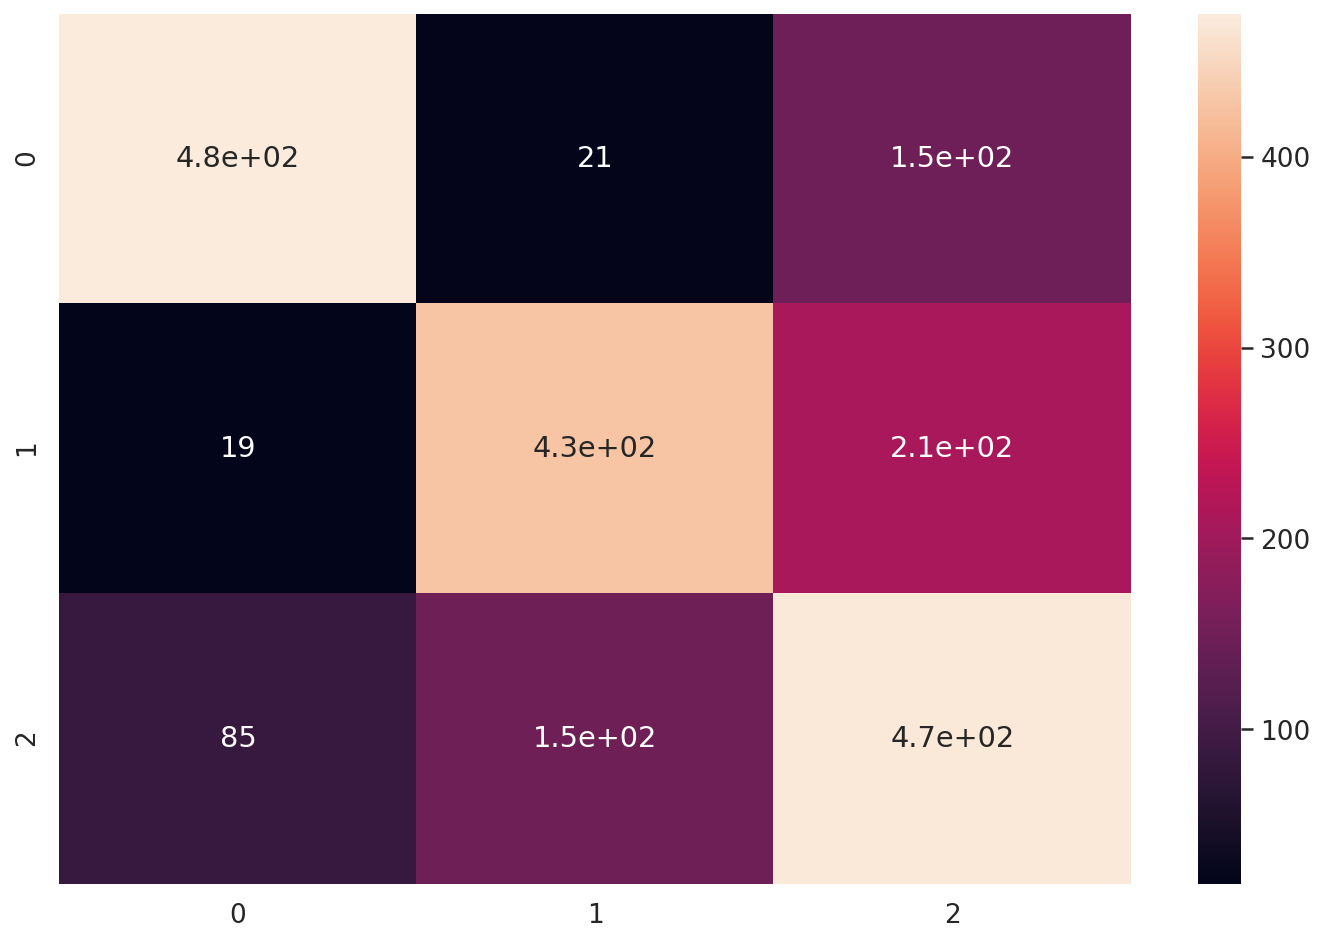

In [ ]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()

The precision Rates the model achieved on the Amazon Reviews Test Dataset: 

Positive : 82% Precision Rate

Negative: 57% Precision Rate

Neutral: 72% Precision Rate

In [ ]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.82      0.74      0.78       644\n     neutral       0.72      0.65      0.68       654\n    negative       0.57      0.67      0.62       702\n\n    accuracy                           0.69      2000\n   macro avg       0.70      0.69      0.69      2000\nweighted avg       0.70      0.69      0.69      2000\n'

The model obtained 68% overall accuracy score on the test set of Amazon Reviews.

This is really good score considering we have experimented with only one transformer model on 80% of train data and also we haven’t explored hyper-parameter optimizations, early stopping & k-fold cross validation. If we can try all these we can further improve the score.

In [ ]:
sklearn.metrics.accuracy_score(true,predicted)

0.6865

Testing the model in a random statement and see how it predicts:

In [ ]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return

The model predicted the statement as Neutral.

In [ ]:
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")


neutral


Now Testing the Model in the Datafiniti Hotel Reviews: 

In [ ]:
from google.colab import files 
  
  
hotel_upload = files.upload()

Saving Datafiniti_Hotel_Reviews.csv to Datafiniti_Hotel_Reviews.csv


In [ ]:
import pandas as pd 
import io 
  
df2 = pd.read_csv(io.BytesIO(hotel_upload['Datafiniti_Hotel_Reviews.csv'])) 
df2.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-05-15T00:00:00Z,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-07-09T00:00:00Z,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


Regrouping the Scores given by customers (from 1 to 5) into postive, negative and neutral sentiments.

In [ ]:
def making_overall(st):
    if(1.0 <= st <= 2.5):
        return 'negative'
    elif(2.5 < st < 3.5):
        return 'neutral'
    else:
        return 'positive'
    
df2['overall'] = df2['reviews.rating'].apply(making_overall)
print(df2.shape)

(10000, 26)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


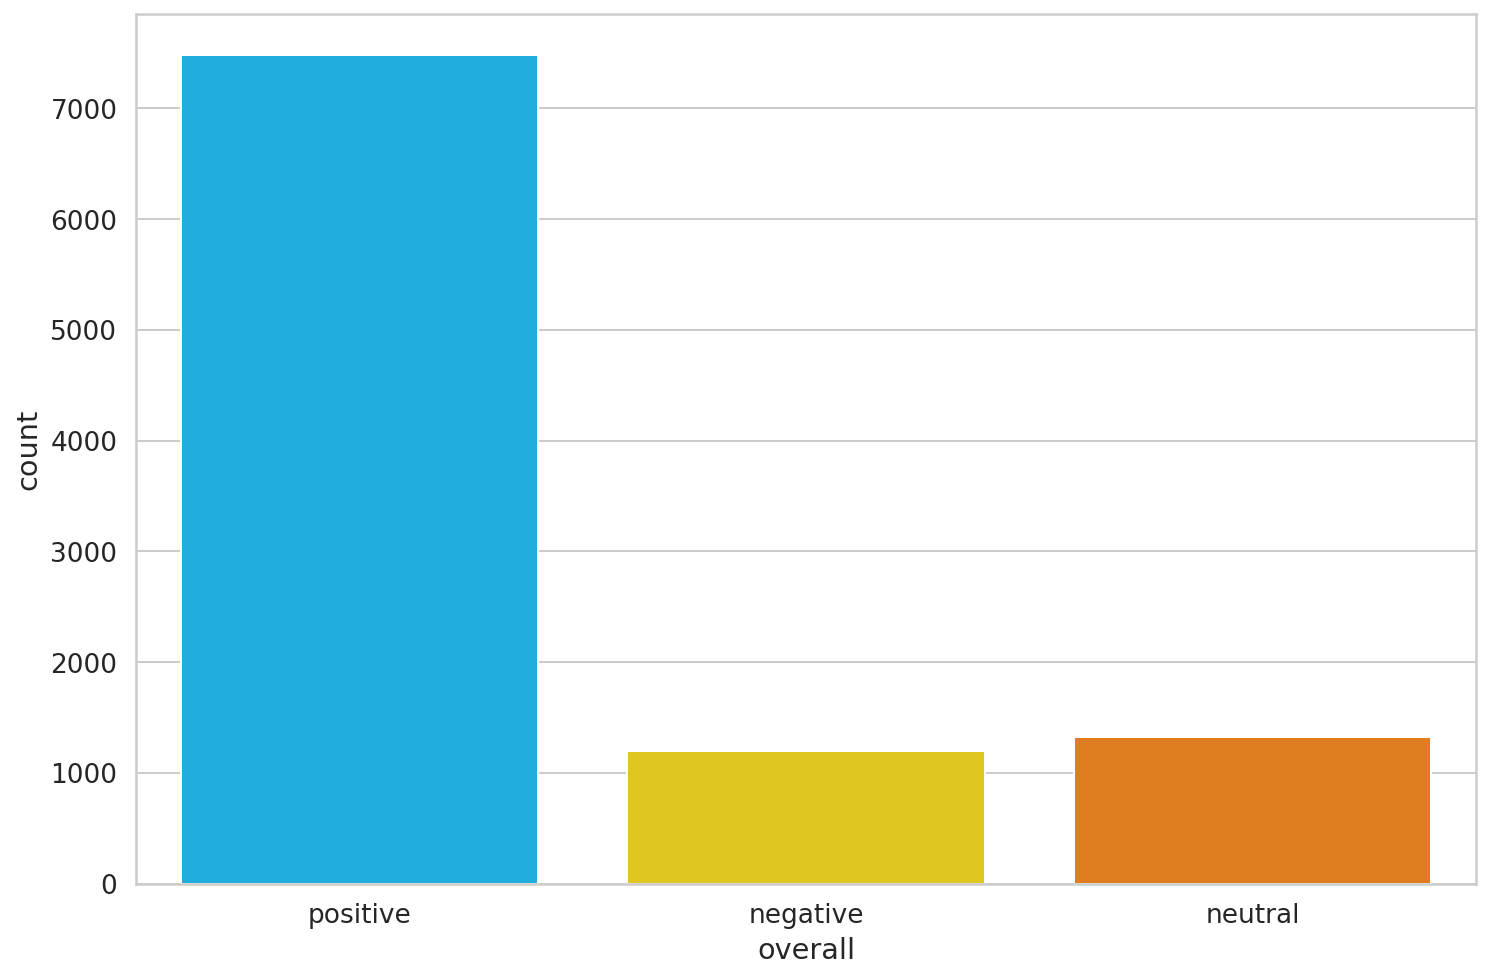

In [ ]:
sns.countplot(df2.overall)

Assigning the values 0 if the sentiment is positive, 1 if negative and 2 if neutral using the making_label function we created before. 

In [ ]:
df2['label'] = df2['overall'].apply(making_label)

Reassigning column names to be the same as the ones we used for the Amazon Set. 
This step is a precausion to what the model will recognise as text and what it will recognize as labels.

In [ ]:
df2['text'] = df2['reviews.text']

In [ ]:
df2 = df2[['text', 'label']]


In [ ]:
df2.dropna()

,text,label
0,Our experience at Rancho Valencia was absolute...,0
1,Amazing place. Everyone was extremely warm and...,0
2,We booked a 3 night stay at Rancho Valencia to...,0
3,Currently in bed writing this for the past hr ...,1
4,I live in Md and the Aloft is my Home away fro...,0
...,...,...
9995,It is hard for me to review an oceanfront hote...,2
9996,"I live close by, and needed to stay somewhere ...",0
9997,Rolled in 11:30 laid out heads down woke up to...,0
9998,Absolutely terrible..I was told I was being gi...,1


In [ ]:
df2['text'] = df2['text'].astype(str).str.replace('\D+', '')

In [ ]:
hotel_rvw = pd.DataFrame({
    'text': df2['text'][:9000].replace(r'\n', ' ', regex=True),
    'label': df2['label'][:9000]
})

In [ ]:
result2, model_outputs2, wrong_predictions2 = model.eval_model(hotel_rvw)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:970: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
result2

{'eval_loss': 1.1525749548806083, 'mcc': 0.07529107413016159}

In [ ]:
model_outputs2

array([[ 0.55006593, -0.56018591,  0.22048768],
       [-0.71459997,  0.77249616,  0.38574657],
       [-0.76347911,  0.84897667,  0.35824579],
       ...,
       [ 0.55006593, -0.56018591,  0.22048768],
       [ 0.55006588, -0.56018579,  0.22048767],
       [ 0.55006588, -0.56018579,  0.22048767]])

In [ ]:
lst2 = []
for arr in model_outputs2:
    lst2.append(np.argmax(arr))

In [ ]:
true2 = hotel_rvw['label'].tolist()
predicted2 = lst2

Showing the confusion matrix with the correct and incorrect predictions the model made on the Hotel Reviews Dataset. 

In [ ]:
import sklearn
mat2 = sklearn.metrics.confusion_matrix(true2 , predicted2)
mat2



array([[4851, 1763,  178],
       [ 572,  383,   55],
       [ 770,  381,   47]])

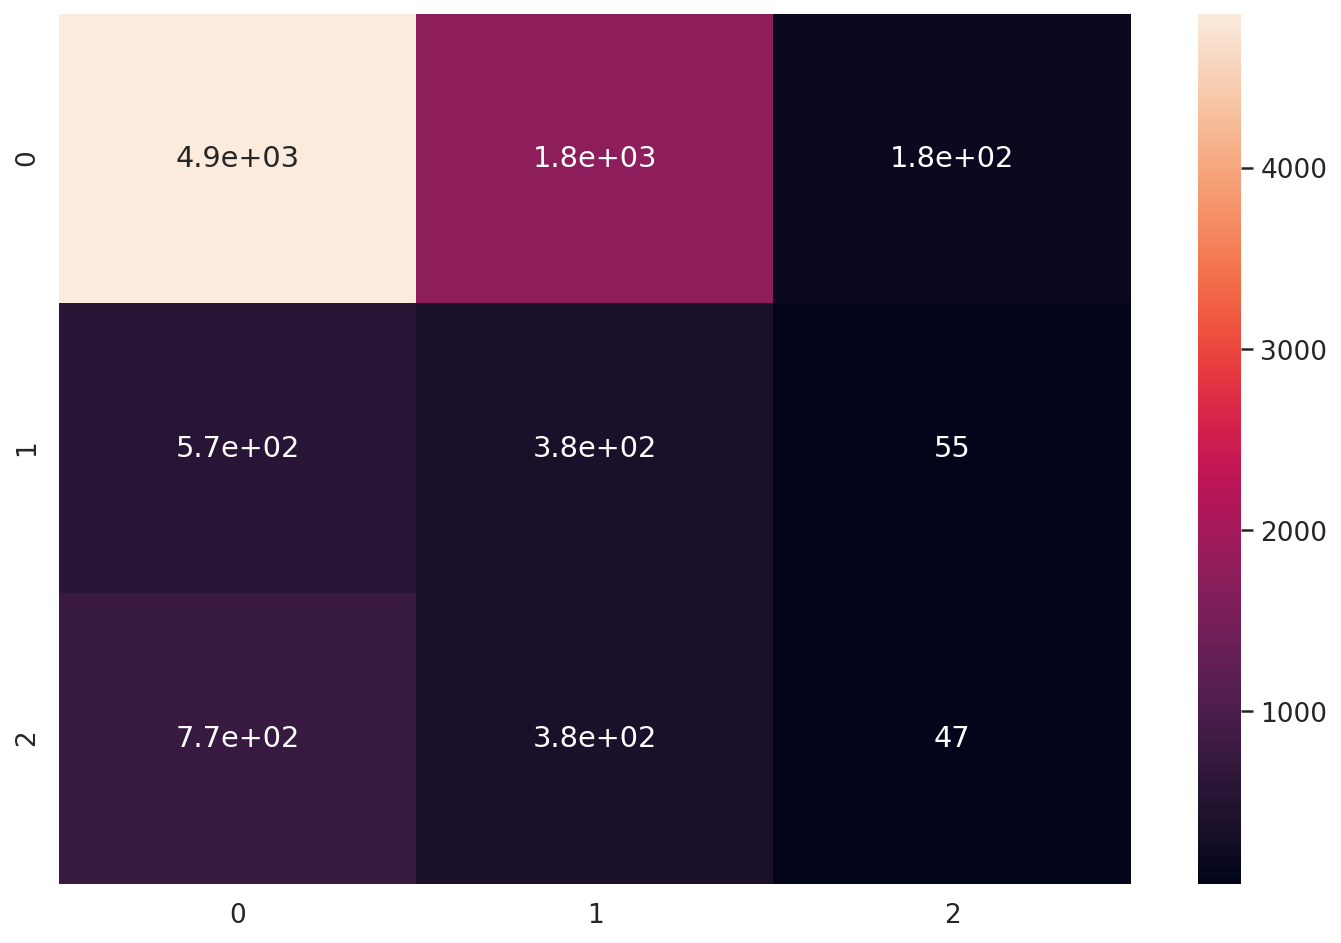

In [ ]:
df_cm = pd.DataFrame(mat2, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()

The precision the model obtained on the label classes:

Positive: 78% precision rate

Negative: 17% precision rate

Neutral: 15% precision rate

In [ ]:
sklearn.metrics.classification_report(true2,predicted2,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.78      0.71      0.75      6792\n     neutral       0.15      0.38      0.22      1010\n    negative       0.17      0.04      0.06      1198\n\n    accuracy                           0.59      9000\n   macro avg       0.37      0.38      0.34      9000\nweighted avg       0.63      0.59      0.60      9000\n'

The model obtained 58% Accuracy Score on the Hotel Reviews Dataset. The accuracy was most precise on the classification of the positive hotel reviews, while it had difficulty classifying the negative and neutral reviews.

In [ ]:
sklearn.metrics.accuracy_score(true2,predicted2)

0.5867777777777777

# III] LDA Topic modelling (Jean-Eudes part)
We will now perform topic modelling on a new dataset, about reviews for hotels.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
import string
import timeit

from sklearn.cluster import KMeans
from sklearn import cluster 
from sklearn import metrics 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data_finiti = pd.read_csv("Datafiniti_Hotel_Reviews.csv")
data_finiti.head(3)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com


In [ ]:
print("dimension :", data_finiti.shape)
print()
print("Variables :",list(data_finiti))

dimension : (10000, 25)

Variables : ['id', 'dateAdded', 'dateUpdated', 'address', 'categories', 'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude', 'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites']


In [ ]:
t = data_finiti['primaryCategories'].value_counts(normalize=True)
t

Accommodation & Food Services                                    0.9928
Arts Entertainment & Recreation                                  0.0045
Healthcare & Social Assistance,Accommodation & Food Services     0.0018
Wholesale Trade,Accommodation & Food Services                    0.0007
Accommodation & Food Services,Arts Entertainment & Recreation    0.0001
Utilities                                                        0.0001
Name: primaryCategories, dtype: float64

In [ ]:
y = data_finiti['categories'].value_counts(normalize=True)
y

Hotels,Hotel                                                                                                                                                                                            0.1905
Hotel,Hotels                                                                                                                                                                                            0.0403
Hotel,Hotels Motels                                                                                                                                                                                     0.0233
Hotels,Hotels and motels,Hotel                                                                                                                                                                          0.0148
Hotels,Lodging,Motels,Hotel                                                                                                                                                 

In [ ]:
ratings = data_finiti['reviews.rating'].value_counts(normalize=True)
ratings

5.00    0.4384
4.00    0.2397
3.00    0.1187
1.00    0.0572
2.00    0.0561
4.80    0.0162
4.60    0.0155
4.40    0.0102
3.75    0.0091
4.15    0.0078
3.95    0.0052
3.55    0.0050
3.35    0.0040
3.15    0.0037
2.90    0.0034
2.70    0.0023
2.50    0.0019
2.30    0.0012
2.10    0.0011
1.65    0.0008
1.45    0.0006
4.50    0.0004
1.90    0.0004
3.25    0.0002
3.50    0.0002
1.25    0.0002
4.25    0.0002
2.75    0.0001
4.75    0.0001
3.45    0.0001
Name: reviews.rating, dtype: float64

Text(0, 0.5, 'count')

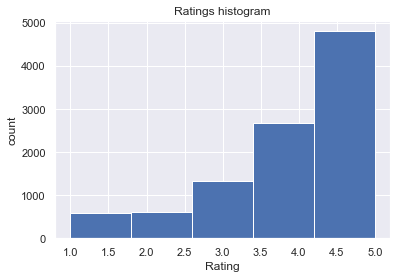

In [ ]:
sns.set()
plt.hist(data_finiti['reviews.rating'],range = (1, 5), bins = 5)
plt.title('Ratings histogram')
plt.xlabel("Rating")
plt.ylabel("count")

 (array([ 588.,  607., 1324., 2671., 4810.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

In [ ]:
for i in range(len(data_finiti)):
    position = data_finiti.index[i]
    if (data_finiti.loc[position,'reviews.rating'] >=1  and data_finiti.loc[position,'reviews.rating'] <= 2.5):
        data_finiti.loc[position,'Label'] = "Negative"
    elif (data_finiti.loc[position,'reviews.rating'] >2.5 and data_finiti.loc[position,'reviews.rating'] < 3.5):
        data_finiti.loc[position,'Label'] = "Neutral"
    else:
        data_finiti.loc[position,'Label'] = "Positive"


In [ ]:
#number of hotels
print(len(data_finiti.groupby('id')))

1853


In [ ]:
data_finiti['reviews.text'][4689] 

'This is a nice hotel, well placed for the business district and a short walk from Market Square. Good Gym and swimming pool, very friendly and helpful staff. Rooms are a good size and well appointed. Would benefit from adding a safe to the rooms, a bit unusual that his is not provided these days.'

In [ ]:
# see : data_finiti['reviews.text'][4000]  the expressions :  dont ; cant 

In [ ]:
data_finiti['reviews.text'].isna().sum()

1

In [ ]:
na_index = data_finiti[ data_finiti['reviews.text'].isna()].index ; na_index

Int64Index([6723], dtype='int64')

In [ ]:
data_finiti.drop(na_index , inplace=True)
len(data_finiti)

9999

In [ ]:
data_finiti['reviews.rating'].isna().sum()

0

Install some modules to implement the LDA and also for the preprocessing

In [ ]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import spacy
from gensim import corpora
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + ['dont', 'cant'] 
# libraries for visualization
import pyLDAvis.gensim
import gensim
import spacy
!python -m spacy download en_core_web_sm
import en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


Preprocessing : tokenization, stopwords removing...

In [ ]:
def final_data(x):

        tokens = word_tokenize(x)  ## tokenize
        tokens = [w.lower() for w in tokens] ## rlowercase
        table = str.maketrans('', '', string.punctuation) ## remove ponctuation
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()] ##remove the numbers
        words = [word for word in words if word not in stop_words] ## remove english stopwords 
        text = " ".join(words)
        return text 

In [ ]:
data_finiti['clean_review'] = data_finiti['reviews.text'].apply(lambda x: final_data(x)) 

**Lemmatization** : Note that here we do not lemmatize the nouns and the adjectives, we could have also lemmatize them, but with this option, we have better results

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
    output = []
    for sent in texts:
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output

In [ ]:
text_list = data_finiti['clean_review'].tolist()
lemmatized_reviews = lemmatization(text_list)

In [ ]:
print("review :",data_finiti['reviews.text'][4688],"\n\n",
      "cleaned review:",text_list[4688],"\n\n"
      "lemmatized review:",lemmatized_reviews[4688])

review : We stayed here when going to Pittsburgh for an event at Duquesne University. We love this hotel because of its proximity to Duquesne and downtown. The rooms are clean, large, and have wonderful views. The staff are always welcoming and friendly. We will continue to stay here whenever we visit Pittsburgh! 

 cleaned review: stayed going pittsburgh event duquesne university love hotel proximity duquesne downtown rooms clean large wonderful views staff always welcoming friendly continue stay whenever visit pittsburgh 

lemmatized review: ['hotel', 'proximity', 'downtown', 'room', 'large', 'wonderful', 'view', 'staff', 'friendly', 'continue', 'visit']


In [ ]:
data_finiti['lemmatized'] = lemmatized_reviews 

In [ ]:
data_finiti['lemmatized'][0]

['experience', 'perfect', 'end', 'special', 'happy', 'heart']

### Latent Dirichlet Allocation (LDA)

#### Topic Modeling
Topic modeling can be thought as an unsuppervised technique that allows to retrieve the topic discussed in a set of document.

#### LDA
LDA is a Generative statistical model that allows sets of observations to be explained by unobseved groups that explain why some parts of the data are similar. If observations are words collected into documents : 

- The LDA posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics

- Each document may be viewed as a mixture of various topics where each document is considered to have a set of topics that are assigned to it via LDA

- In LDA, the topic distribution has a sparse Dirichlet prior.  The sparse Dirichlet priors encode the entuition that documents cover only a small set of topics use only a small set of words frequently

So, in LDA:
each document is assumed to be characterized by a particular set of topics.

**examples**

Doc1 = 0.4Politics +0.2Religion + 0.1Sports

Doc2 = 0.4Sport + 0.1Religion  +0.0 Politics

and each topic is assumed to be characterized by a particular set of words:

**examples**

Politcs = 0.4Election +0.2Democrat +0.1Republican+...

Sports = 0.3Baseball + 0.4Basketball + 0.2soccer +...

Religion = 0.2Christian + 0.2Muslim +...

**LDA Implementation** : 
- Choose the number of topics = K
- Randomly assign each word in each document to one of the K topics
- Go through every word and its topic assignment in each document
- Look at :
	1. How often the topic occurs in te document
	2. How often the words occurs in the topic 

- Based on this info assign the word a new topic
- After multiple iterations of this eventually the topics will make sense and human should be able to interpret this

Sources : <a href="https://medium.com/analytics-vidhya/analyze-trip-advisor-hotel-reviews-lda-topic-modeling-2c1a56e35a09">1</a>, <a href="https://www.youtube.com/watch?v=nNvPvvuPnGs">2</a>

First we need to create a document term matrix. This will be done by the function `doc2bow()`.

The function `doc2bow()` simply counts the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a sparse vector. The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, the words computer (id 0) and human (id 1) appear once; the other ten dictionary words appear (implicitly) zero times.

See <a href= "https://radimrehurek.com/gensim/tut1.html"> this link</a> 

In [ ]:
#Create vocabulary dictionary and document term matrix
dictionary = corpora.Dictionary(lemmatized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in lemmatized_reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state = 4,
                chunksize=100, passes=50,iterations=100)

In [ ]:
lda_model.print_topics()

[(0,
  '0.134*"room" + 0.024*"floor" + 0.023*"dirty" + 0.020*"night" + 0.018*"front" + 0.016*"weekend" + 0.015*"suite" + 0.013*"tv" + 0.012*"bathroom" + 0.011*"elevator"'),
 (1,
  '0.025*"bed" + 0.022*"amazing" + 0.021*"overall" + 0.019*"early" + 0.017*"sheet" + 0.017*"due" + 0.016*"courteous" + 0.016*"part" + 0.015*"carpet" + 0.015*"love"'),
 (2,
  '0.058*"stay" + 0.030*"place" + 0.021*"value" + 0.019*"reservation" + 0.019*"hotel" + 0.019*"business" + 0.016*"sleep" + 0.016*"night" + 0.016*"week" + 0.013*"desk"'),
 (3,
  '0.040*"time" + 0.031*"year" + 0.017*"owner" + 0.016*"hotel" + 0.015*"service" + 0.015*"long" + 0.014*"several" + 0.014*"amenity" + 0.012*"hour" + 0.012*"day"'),
 (4,
  '0.063*"room" + 0.050*"hotel" + 0.037*"staff" + 0.036*"clean" + 0.032*"good" + 0.031*"great" + 0.029*"breakfast" + 0.027*"nice" + 0.022*"friendly" + 0.020*"comfortable"')]

There are two scores to measures te level of relevance of the topics found by the LDA , (measure of performance for LDA): 

**Perplexity** is a measurement of how well a probability model predicts a test data. The lower the Perplexity, the better. 

**Topic Coherence** measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. The higher the Coherence Score, the better. In this case, the relevance is rather low.

In [ ]:
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=len(data_finiti)))  

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.911021762442012

Coherence Score:  0.42130998734669767


To find optimal number of topics, we will make LDA model for various number of topics and we will choose the one who maximizes the coherence score for example. 

Code are from <a href="https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore ">here</a>

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state = 4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
np.random.seed(1)
model_list, coherence_values = compute_coherence_values(dictionary = dictionary, corpus=doc_term_matrix, 
                                                        texts = lemmatized_reviews, start=2, limit=50, step=1)

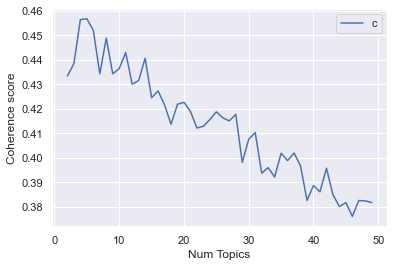

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

As shown in the graph, we obtain the highest coherence score when defining 5 different topics. When calculating the optimal number of topics, we obtain the same number, as shown below:

In [ ]:
##retrive the position of the maximum coherence in the coherence_values list
max_index = coherence_values.index(max(coherence_values));max_index

3

In [ ]:
## use this position to retrive the correspondant number of topics
number_oftopics = np.arange(2,50).tolist()
optimal_numberOf_topic = number_oftopics[max_index]; optimal_numberOf_topic

5

In [ ]:
# Select the optimal model and print the topics
optimal_model = model_list[max_index]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.052*"room" + 0.022*"great" + 0.020*"staff" + 0.020*"hotel" + 0.019*"bed" + 0.015*"good" + 0.014*"night" + 0.014*"time" + 0.014*"friendly" + 0.011*"clean"'),
 (1,
  '0.037*"room" + 0.036*"hotel" + 0.028*"staff" + 0.018*"time" + 0.012*"family" + 0.009*"clean" + 0.009*"helpful" + 0.009*"great" + 0.009*"night" + 0.009*"location"'),
 (2,
  '0.045*"great" + 0.029*"place" + 0.026*"hotel" + 0.024*"room" + 0.014*"staff" + 0.012*"area" + 0.011*"breakfast" + 0.011*"stay" + 0.010*"restaurant" + 0.010*"nice"'),
 (3,
  '0.045*"hotel" + 0.040*"good" + 0.034*"room" + 0.031*"clean" + 0.028*"staff" + 0.025*"great" + 0.023*"breakfast" + 0.021*"nice" + 0.017*"friendly" + 0.015*"location"'),
 (4,
  '0.076*"room" + 0.035*"hotel" + 0.019*"breakfast" + 0.019*"staff" + 0.018*"nice" + 0.017*"clean" + 0.013*"night" + 0.012*"bed" + 0.012*"good" + 0.011*"comfortable"')]

From the 10 words the most present in each of the 5 topics found by the LDA model, and the visualisation below with the most frequent 30 words, we can deduce a global theme for each topic : <br>
- 0, round number 3 on graph  : **Services offered and problems** <br>
- 1, round number 4 on graph  : **Welcoming of the staff** <br>
- 2, round number 5 on graph  : **Staff and food** <br>
- 3, round number 2 on graph  : **Area, location of the hotel** <br>
- 4, round number 1 on graph  : **Comfort and welcoming of the staff** <br>
The differences between each topic are not evident, but we can see some global subjects evocated for each of them. <br>


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.042072 -0.039239       1        1  34.432140
3      0.022052 -0.052240       2        1  31.171247
0     -0.074400 -0.008698       3        1  13.078815
1     -0.005257  0.106081       4        1  11.952231
2      0.099677 -0.005903       5        1   9.365567, topic_info=        Term         Freq        Total Category  logprob  loglift
12     great  3209.000000  3209.000000  Default  30.0000  30.0000
15     place  1667.000000  1667.000000  Default  29.0000  29.0000
33      room  8592.000000  8592.000000  Default  28.0000  28.0000
92      time  1550.000000  1550.000000  Default  27.0000  27.0000
58     hotel  6092.000000  6092.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
404    right    61.824524   356.713928   Topic5  -5.5578   0.6155
92      time    85.057114  1550.956787   Topic5  -5.2388  -0.5352
34   service    77.604469  1094.632568   Topic5  -5.3305  -0.2784
76     clean    80.738480  3153.278076   Topic5  -5.2909  -1.2969
180    price    71.533691   884.337891   Topic5  -5.4119  -0.1465

[435 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
307       1  0.211389   able
307       2  0.292422   able
307       3  0.306514   able
307       4  0.155019   able
307       5  0.035232   able
...     ...       ...    ...
96        2  0.151768   year
96        3  0.354714   year
96        4  0.264712   year
96        5  0.045883   year
5569      3  0.903089  yummy

[948 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 2, 3])

We have adapted the visualizer to show not just the frequency of tokens in the corpus but rank them according to their relationship to the LDA topic mode.
Ranked by saliency, the graph will show the frequency of the terms that contribute the most information to all topics. 
Ranked by relevance it will show the terms most relevant to a specific topic and the proportion of their frequency in the topic compared to the rest of the corpus. 
Metric definitions are:
1.	saliency(term w) = frequency(w) * [sum_t p(t | w) * log(p(t | w)/p(t))] for topics 
2.	relevance(term w | topic t) = λ * p(w | t) + (1 - λ) * p(w | t)/p(w)

The relevance of a term to a topic allows us to flexibly rank terms in order of usefulness for interpreting topics.
Where lambda determines the weight given to the probability of term w under topic k relative to its lift (measuring both on the log scale). 


Setting lambda = 1 results in the familiar ranking of terms in decreasing order of their topic-specific probability and setting = 0 ranks terms solely by their lift. 


In our case, for lambda = 1 and topic 1, the top 5 most relevant terms are {room, hotel, breakfast, staff, nice}, while when setting it to 0, the top 5 most relevant terms are {cabin, curtain, wet, ant, disgusting}. These are inherently in line with the topic itself that based on its weighs, we named Services offered and Problems.


In [ ]:
## output of topic probabilities per post ; this return topic distribution for the given document bow, as a list of (topic_id, topic_probability) 2-tuples.
topic_prob_per_post = [optimal_model.get_document_topics(doc_term_matrix[i],minimum_probability=0.0) for i in range(len(doc_term_matrix))]

##or, for each review, just form a list that contains the probability of the different topics
topic_prob_per_post_2 = [ [topic_prob_per_post[i][j][1] for j in range(optimal_numberOf_topic)] for i in range(len(doc_term_matrix)) ]


In [ ]:
topic_prob_per_post[0]

[(0, 0.02888086),
 (1, 0.88191223),
 (2, 0.031129407),
 (3, 0.0291663),
 (4, 0.02891121)]

In [ ]:
topic_prob_per_post_2[0]

[0.02888086, 0.88191223, 0.031129407, 0.0291663, 0.02891121]

In [ ]:
topic_prob_per_post_2[0].index(max(topic_prob_per_post_2[0]))

1

In [ ]:
## save the topic distribution of each review in the dataset
data_finiti['topic_distribution'] = topic_prob_per_post_2

In [ ]:
##find the position of the maximal probability in each list
data_finiti['max_topic_position'] = [prob.index(max(prob)) for prob in topic_prob_per_post_2]

##form the different condition ; 0:Topic 1 ;  1:Topic 2 ;  2:Topic 3 ;  3:Topic 4 and  4:Topic 5
conditions = [
        (data_finiti['max_topic_position'] == 0),
        (data_finiti['max_topic_position'] == 1),
        (data_finiti['max_topic_position'] == 2),
        (data_finiti['max_topic_position'] == 3),
        (data_finiti['max_topic_position'] == 4)]

choices = ["Topic 1","Topic 2","Topic 3","Topic 4","Topic 5"]

data_finiti['Assigned Topic'] = np.select(conditions, choices)


In [ ]:
## we can see here the proportion of Negative, Neutral or Positive reviews in each topic

pd.crosstab(data_finiti['Label'],data_finiti['Assigned Topic'],normalize = 'columns')

Assigned Topic,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Label,,,,,
Negative,0.227386,0.103025,0.052755,0.034557,0.202540
Neutral,0.147718,0.098299,0.096131,0.098312,0.188254
Positive,0.624896,0.798677,0.851114,0.867131,0.609206


# IV] Clustering  (Jean-Eudes part)

For the clustering , we try different algorithms : kmeans, hierarchical clustering (agglomerative) and hdbscan. 
We will feed in these algorithms with the vectors issued from the reviews, so we need to embed these reviews into vector. To that end, we can use word embedding or sentence embedding. It turns out that with sentence embedding the result would be more precise, so we decide to use in a first time SentenceBERT model to tranform our reviews, but this took too much time so use use Doc2vec



In [ ]:
!pip install sentence-transformers

In [ ]:
""" remove the quote if you want to use the SentenceBERT model

##import a sentence embedding model : SentenceBERT
from sentence_transformers import SentenceTransformer
robert_model = SentenceTransformer('roberta-large-nli-stsb-mean-tokens')

review_list = data_finiti['reviews.text'].tolist()

##encode the reviews
start = timeit.default_timer()
review_embeddings = robert_model.encode(review_list)
stop = timeit.default_timer()

print('Time: {:.5f} min'.format((stop - start)/60)) 
print('BERT embedding vector - length', len(review_embeddings[0])) """

"\n##import a sentence embedding model : SentenceBERT\nfrom sentence_transformers import SentenceTransformer\nrobert_model = SentenceTransformer('roberta-large-nli-stsb-mean-tokens')\n\nreview_list = data_finiti['reviews.text'].tolist()\n\n##encode the reviews\nstart = timeit.default_timer()\nreview_embeddings = robert_model.encode(review_list)\nstop = timeit.default_timer()\n\nprint('Time: {:.5f} min'.format((stop - start)/60)) \nprint('BERT embedding vector - length', len(review_embeddings[0])) "

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

##build a tagged sentence corpus. Each sentence is now represented as a TaggedDocument containing a list of the words in it and a tag associated with it

tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(lemmatized_reviews)]

In [ ]:
## Train doc2vec model, we choose to embed the sentences in 50 dimensional vectors 
start = timeit.default_timer()
n = 50
model = Doc2Vec(tagged_data, vector_size = n, window = 4, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''
stop = timeit.default_timer()
print('Time: {:.5f} min'.format((stop - start)/60)) 

Time: 1.11373 min


In [ ]:
# show vocabulary; remove the # to see 
# model.wv.vocab

In [ ]:
model.docvecs[0]

array([ 0.9770932 , -0.07624643, -0.69353706,  0.2870053 ,  0.24321036,
       -0.16709779,  0.56539565,  0.33680546, -0.06855148, -0.565172  ,
        0.52772456,  0.0617749 , -0.18990907, -0.08751526, -1.0049179 ,
        0.37131175,  0.5292235 , -0.08680864, -0.01718982,  0.32598907,
        0.711995  ,  0.50119567, -0.08030416,  0.6797896 ,  0.353408  ,
        0.9115216 , -0.04441794,  0.4869645 , -0.60138416, -1.4111726 ,
        0.99156255,  1.4415563 , -0.7316821 ,  0.09457873, -0.05058215,
        0.13979901,  0.66220546,  0.6069687 ,  0.0665628 , -0.5956392 ,
        0.963952  , -1.1198614 , -1.7945591 ,  0.21430108,  0.30538017,
       -0.89147747,  1.5691589 ,  0.45380092,  0.31152585,  0.6330682 ],
      dtype=float32)

In [ ]:
## stack the vector of sentences into an array
sentence_vector = np.hstack([model.docvecs[i].reshape((n,1)) for i in range(len(data_finiti))]).T; sentence_vector.shape

(9999, 50)

### 1) KMeans

We repeat the kmeans for different number of cluster and see if there will be an elbow.

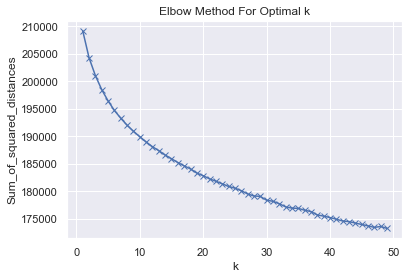

In [ ]:
##repeat the kmeans for different k
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sentence_vector)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

There is not a clear elbow, let us reduce the number of trial in order to zoom 

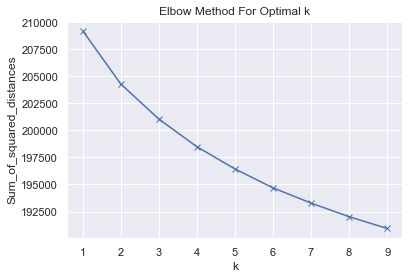

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sentence_vector)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Same result, we can't clearly decide the number of clusters

### 2) Agglomerative Clustering

In [ ]:
Z = shc.linkage(sentence_vector, method='ward')

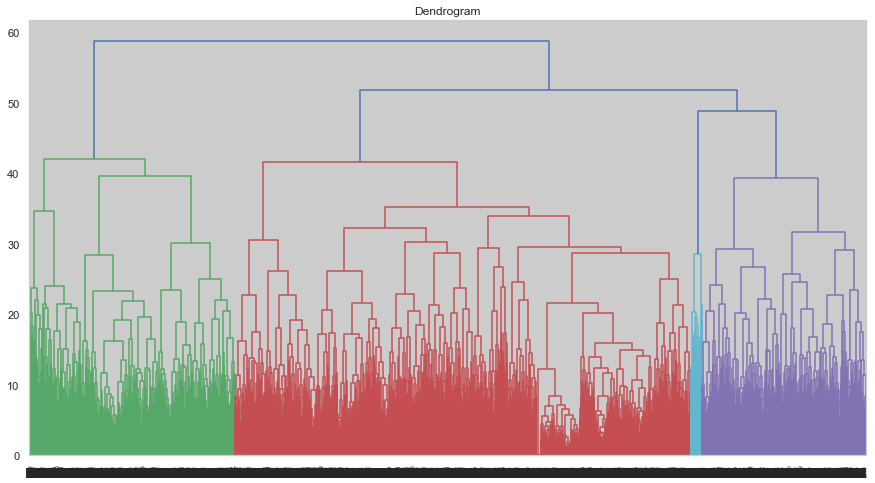

In [ ]:
##plot the dendrogram
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
plt.title("Dendrogram")
dend = shc.dendrogram(Z,color_threshold=48)

As there is a jump between the 3rd node and the 4th node (from top to bottom), it seems that cutting the tree between this node could give a good clustering. This cutting leads to 4 clusters

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(sentence_vector)

Let us plot the wordcloud for the top-10 words of each cluster

In [ ]:
##add the predicted labels of the AgglomerativeClustering to the dataframe
data_finiti['hclass'] = y_hc

In [ ]:
##create a dictionary to store the reviews of each cluster
class_review_hc = {}
for i in np.unique(y_hc).tolist():    
    class_review_hc[i] = data_finiti[data_finiti['hclass'] == i]['lemmatized'].tolist()

In [ ]:
##define a function that returns the most frequent bigrams in a list of reviews, the reviews must already be tokenized

def most_freq_gram(list_of_review, form = "bi" , n = 10):
    
    if form == "bi":
        bigrams_list = [list(nltk.bigrams(list_of_review[i])) for i in range(len(list_of_review))] ##list of bigrams in each reviews
        bigrams_list = [x for elem in bigrams_list for x in elem] ##transform the list of list into single list
        dico = [' '.join(tup) for tup in bigrams_list] ## transform the bigram that initially are in the form ('word1', 'word2') to ('word1 word2')

        #Using count vectoriser to view the frequency of bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))
        bag_of_words = vectorizer.fit_transform(dico)
        
    elif form == "uni":
        unigrams_list = [x for elem in list_of_review for x in elem] ##since the reviews are already tokenized, form the whole list of the reviews 
        vectorizer = CountVectorizer(ngram_range=(1, 1))
        bag_of_words = vectorizer.fit_transform(unigrams_list)
    
    ##compute and sort the frequency of the uni/bigrams, and select the top-n
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    most_freq = words_freq[:n] 
    most_freq = dict(most_freq)
    
    return most_freq

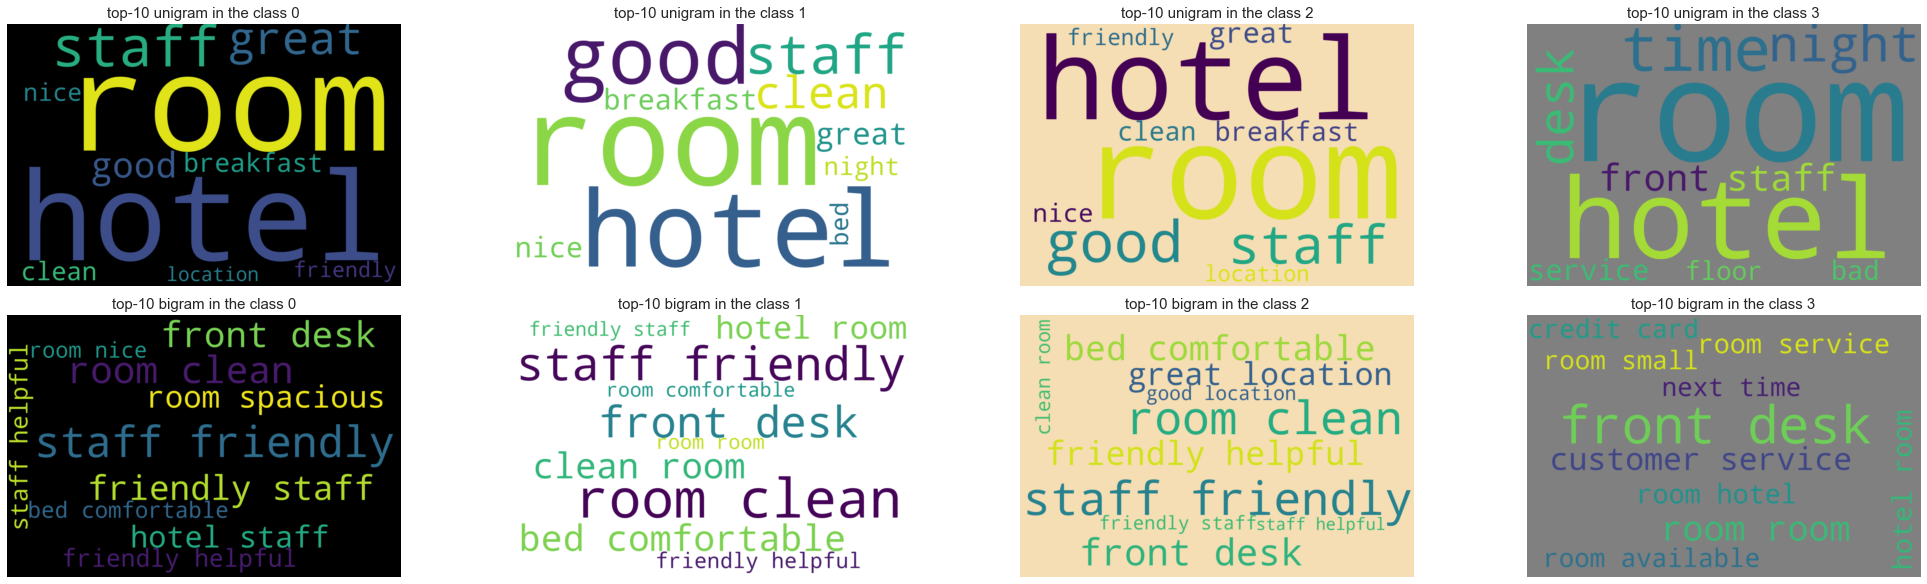

In [ ]:
sns.set_style('white')

WC_height = 1000
WC_width = 1500
color = ["black","white","wheat","gray"]

classe = np.unique(y_hc).tolist()

fig, axs = plt.subplots(2, 4, figsize=(28, 8), constrained_layout=True)

for i in range(len(classe)):
    axs[0,i].imshow(WordCloud(height=WC_height, width=WC_width,background_color=color[i]).fit_words(most_freq_gram(class_review_hc[i], form = "uni")),interpolation='bilinear')
    axs[0,i].set_title(f"top-10 unigram in the class {i}",fontsize = 15)
    axs[0,i].set_axis_off()
    axs[1,i].imshow(WordCloud(height=WC_height, width=WC_width,background_color=color[i]).fit_words(most_freq_gram(class_review_hc[i], form = "bi")),interpolation='bilinear')
    axs[1,i].set_title(f"top-10 bigram in the class {i}",fontsize = 15)
    axs[1,i].set_axis_off()

The wordclouds are not too different from each other.

### 3) HDBSCAN

Hdbsan is a non-parametric method that looks for a cluster hierarchy shaped by the multivariate 
modes of the underlying distribution. Rather than looking for clusters with a particular shape, it looks for 
regions of the data that are denser than the surrounding space.

For example 
K-means performs best when clusters are:
  “round” or spherical,
  equally sized,
  equally dense,
  most dense in the center of the sphere,
  not contaminated by noise/outliers,

so if the database has : 
  Clusters with arbitrary shapes,
  Clusters of different sizes,
  Clusters with different densities,
  Some noise and maybe some outliers,
kmeans will fail.

The goal of the authors who developped this algorithm was to allow varying density clusters. The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points ‘falling out of a cluster’. This results in a smaller tree with fewer clusters that ‘lose points’. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability. The immediate advantage of this is that we can have varying density clusters; the second benefit is that we have eliminated the epsilon parameter as we no longer need it to choose a cut of the dendrogram. Instead we have a new parameter `min_cluster_size` which is used to determine whether points are ‘falling out of a cluster’ or splitting to form two new clusters.(See https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html#hdbscan ; https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html ; https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e, for more explanations )


In [ ]:
!pip install umap-learn hdbscan

     |████████████████████████████████| 4.7MB 7.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301798 sha256=dea9ed7b70da7a934e9a1b00117c0015644e913a5479ac5e7fe3a4db17e22831
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
from hdbscan import HDBSCAN, approximate_predict

In [ ]:
##instantiate a HDBSCAN clusterer, with a min_cluster_size of 10 and fit  
clusterer = HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer.fit(sentence_vector)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=10, min_samples=None, p=None,
        prediction_data=False)

In [ ]:
##predict the clusters
clusters = clusterer.fit_predict(sentence_vector)
np.unique(clusters)

array([-1,  0,  1,  2])

We have three real clusters and a noise cluster. Note that for `min_cluster_size=15` for example there were 2 cluster and a noise cluster (very huge) ; for `min_cluster_size=5` there were 14 clusters and a huge noise cluster

In [ ]:
#Build the cluster hierarchy ; the code below generate an error due to the depth
# clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

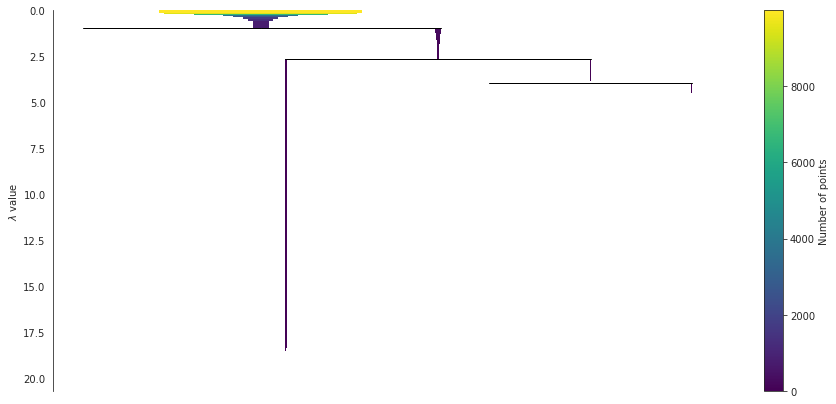

In [ ]:
#Condense the cluster tree
plt.figure(figsize=(15,7))
clusterer.condensed_tree_.plot()

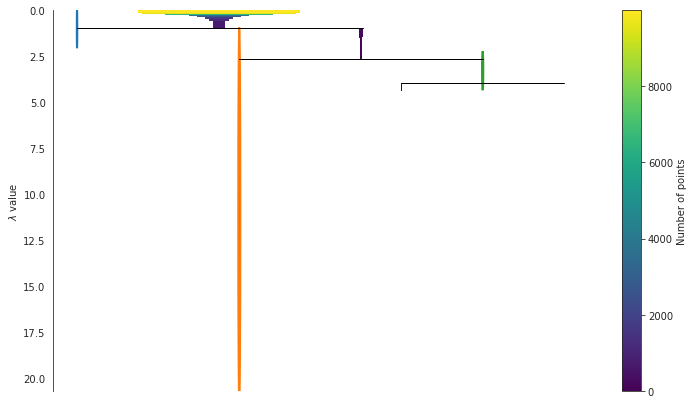

In [ ]:
##Extract the clusters
plt.figure(figsize=(12,7))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [ ]:
##add the predicted labels of the hdbscan to the dataframe
data_finiti['hdbscanclass'] = clusters

In [ ]:
##create a dictionary to store the reviews of each cluster
class_review_hdbscan = {}
for i in np.unique(clusters).tolist():    
    class_review_hdbscan[i] = data_finiti[data_finiti['hdbscanclass'] == i]['lemmatized'].tolist()

In [ ]:
data_finiti['hdbscanclass'].value_counts()

-1    9880
 1      65
 2      39
 0      15
Name: hdbscanclass, dtype: int64

Too much reviews have been considered as noise 

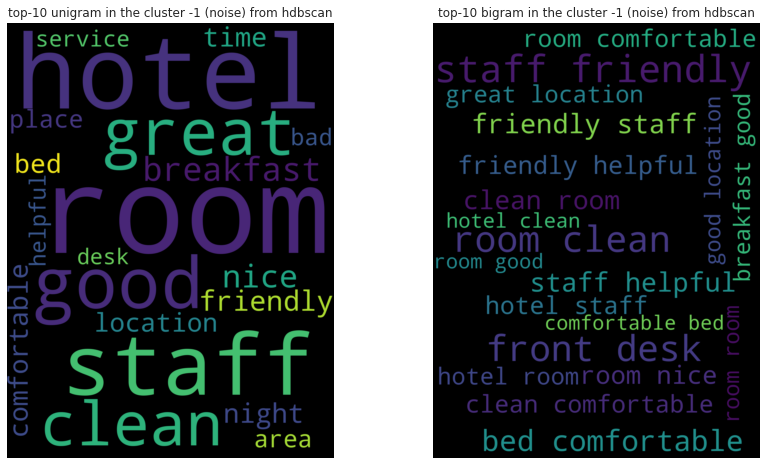

In [ ]:
sns.set_style('white')

WC_height = 2000
WC_width = 1500
fig, axs = plt.subplots(1,2, figsize=(14, 8))

axs[0].imshow(WordCloud(height=WC_height, width=WC_width).fit_words(most_freq_gram(class_review_hdbscan[-1], form = "uni",n = 20)),interpolation='bilinear')
axs[0].set_title("top-10 unigram in the cluster -1 (noise) from hdbscan")
axs[0].set_axis_off()

axs[1].imshow(WordCloud(height=WC_height, width=WC_width).fit_words(most_freq_gram(class_review_hdbscan[-1], form = "bi",n = 20)),interpolation='bilinear')
axs[1].set_title("top-10 bigram in the cluster -1 (noise) from hdbscan")
axs[1].set_axis_off()
    

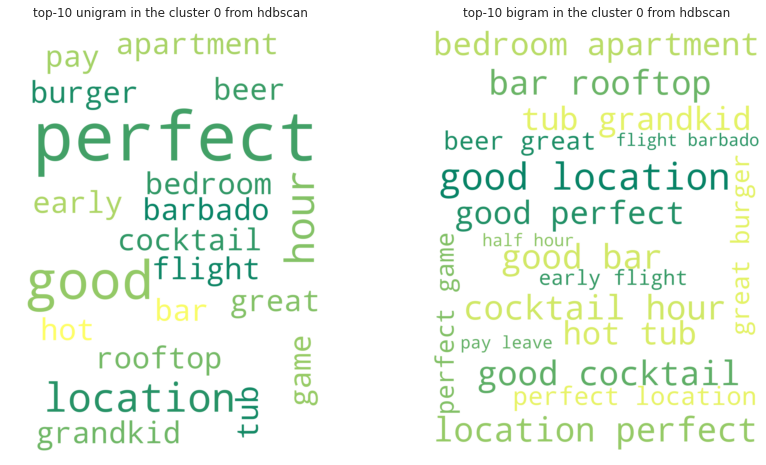

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14, 8))

axs[0].imshow(WordCloud(height=WC_height, width=WC_width,background_color='white',colormap='summer').fit_words(most_freq_gram(class_review_hdbscan[0], form = "uni",n = 20)),interpolation='bilinear')
axs[0].set_title("top-10 unigram in the cluster 0 from hdbscan")
axs[0].set_axis_off()

axs[1].imshow(WordCloud(height=WC_height, width=WC_width,background_color='white',colormap='summer').fit_words(most_freq_gram(class_review_hdbscan[0], form = "bi",n = 20)),interpolation='bilinear')
axs[1].set_title("top-10 bigram in the cluster 0 from hdbscan")
axs[1].set_axis_off()

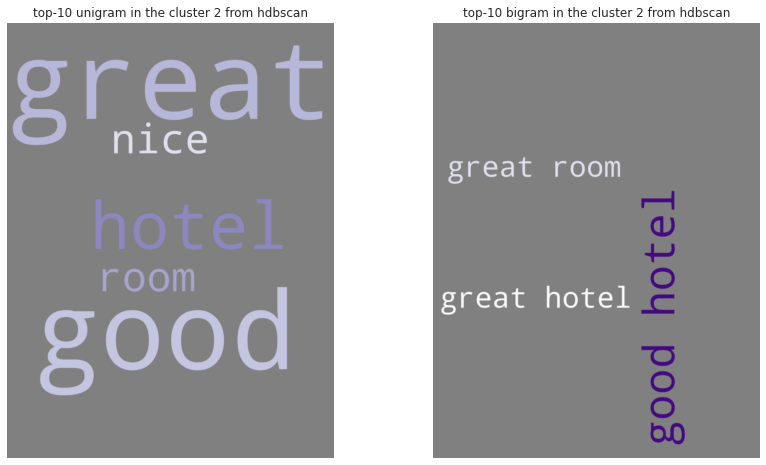

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14, 8))

axs[0].imshow(WordCloud(height=WC_height, width=WC_width,background_color='gray',colormap='Purples').fit_words(most_freq_gram(class_review_hdbscan[2], form = "uni",n = 10)),interpolation='bilinear')
axs[0].set_title("top-10 unigram in the cluster 2 from hdbscan")
axs[0].set_axis_off()

axs[1].imshow(WordCloud(height=WC_height, width=WC_width,background_color='gray',colormap='Purples').fit_words(most_freq_gram(class_review_hdbscan[2], form = "bi",n = 10)),interpolation='bilinear')
axs[1].set_title("top-10 bigram in the cluster 2 from hdbscan")
axs[1].set_axis_off()

# V] Conclusion

## 1) Global use of Machine Learning on Sentiment Analysis

In a business approach, sentiment analysis is valuable tool for  business owners, advertisers and social media companies. It provides insights that help drive effective business decisions, strategies and objectives across a range of sectors in an efficient way, as the algorithms are able to analyse thousands of datapoints in a very short time. 


 We saw wordclouding as a tool to visualize the most used words based on sentiment on the Amazon Reviews Dataset. 
 Also, on the hotel reviews dataset when topic modelling, we applied t-SNE clustering and pyLDAVis, which provide more details into the clustering of the topics.

Our main objective was to train models on the Amazon Reviews dataset and test them on the Hotel Reviews dataset, to show that these models are unbiased and can indeed be used in any kind of other cusomer reviews, as long as the labelling remains the same in the training and test sets. Our classification was done on three classes: Positive, Neutral and Negative customer sentiment. A more fine approach might have given more precise results. 

All models proved to predict better when a review was positive, but all had trouble defining the correct label when they were neutral or negative. In sentiment analysis, there is no exact answer whether a review is positive, neutral or negative, we define this label based on the number of stars the customer has put against their statement, but there is always a little bit of bias between the text and the scoring of the product/service. 


## 2) Marketing Insights from the Datafiniti Hotel Reviews 

The takeaway: 
In Hotels, the five topics that customers will mostly comment on are: 
1.	Services offered and problems encountered:
2.	Welcoming of the Staff
3.	Restauration Staff and Food
4.	Area and location of the Hotel
5.	Comfort and welcoming of the staff. 

From the LDA analysis, we can deduce that some points are important for the clients about hotels, which are the staff of the hotel, the location of the hotel and the services and especially the cleanliness.

In the Datafiniti Hotel Reviews: over 62% of the reviews in all 5 topics were positive, while 14% and 18% of the reviews on the Service Offered and problems and Comfort and Welcoming of the staff were neutral. These two topics also being quite similar, had 22% and 20% of the reviewers respectively commenting negatively. <br>

The management team in these hotels should mostly focus on improving their staff service, as  10% of the reviews on the welcoming of the staff were also negative, and especially the cleanness of the rooms and comfort offered.

The areas that the hotels were raved about were the location, with 86% of customers responding positively and the Restauration Staff and Food, with 85% positive reviews.

<br>

In general, what we can also observe in the clustering part is that the main points evocated in the reviews are: the staff of the hotel, the room (cleanliness) and the front desk.<br>

Thanks to ML technics, we can see what the expectation for the client are, what matters for a client, and analyze which services (cleanliness, staff, location) are important for him. It allows us to analyze a feedback of thousands of clients, in a small amount of time once the models are implemented. This highlights again the fact that a good predictive model on Hotel Reviews is very useful for quality control to the management team of the hotel.


# Bibliography

https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1

https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html

https://medium.com/analytics-vidhya/analyze-trip-advisor-hotel-reviews-lda-topic-modeling-2c1a56e35a09

https://medium.com/@aniruddha.choudhury94/part-2-bert-fine-tuning-tutorial-with-pytorch-for-text-classification-on-the-corpus-of-linguistic-18057ce330e1

https://huggingface.co/transformers/model_doc/bert.html

https://medium.com/towards-artificial-intelligence/text-classification-with-simple-transformers-a29d13358135


https://www.depends-on-the-definition.com/named-entity-recognition-with-bert/

https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


https://www.youtube.com/watch?v=Osj0Z6rwJB4&ab_channel=VenelinValkov

https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf

https://www.youtube.com/watch?v=nNvPvvuPnGs&ab_channel=RSREETech-NLP%2FAI%2FMLsimplified

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/ https://docs.google.com/spreadsheets/d/14QplCdTCDwEmTqrn1LH4yrbKvdogK4oQvYO1K1aPR5M/edit#gid=0